In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
# Calculate P Value 
from scipy import stats
from scipy.stats import ttest_ind

In [4]:
df = pd.read_csv('C:/Users/Judley Joseph/Downloads/WA_Marketing-Campaign.csv')
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [3]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Text(0.5, 1.0, 'Percentage of sales across the different promotions')

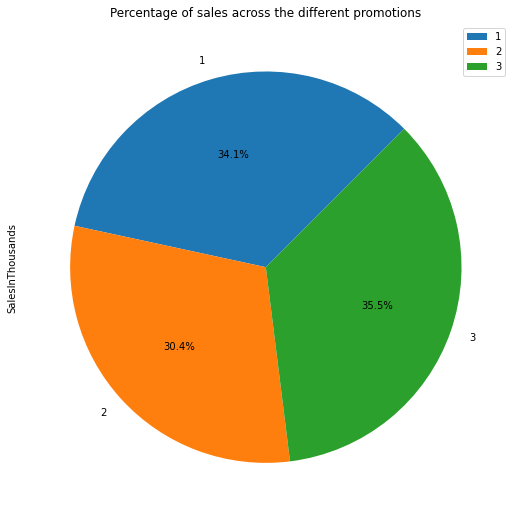

In [7]:
# percentage of sales across the different promotions

plt = df.groupby('Promotion').sum().plot(kind='pie', y='SalesInThousands', startangle=45, figsize=(9,9), autopct='%1.1f%%')
plt.set_title('Percentage of sales across the different promotions')

Text(0.5, 1.0, 'market sizes across different promotions')

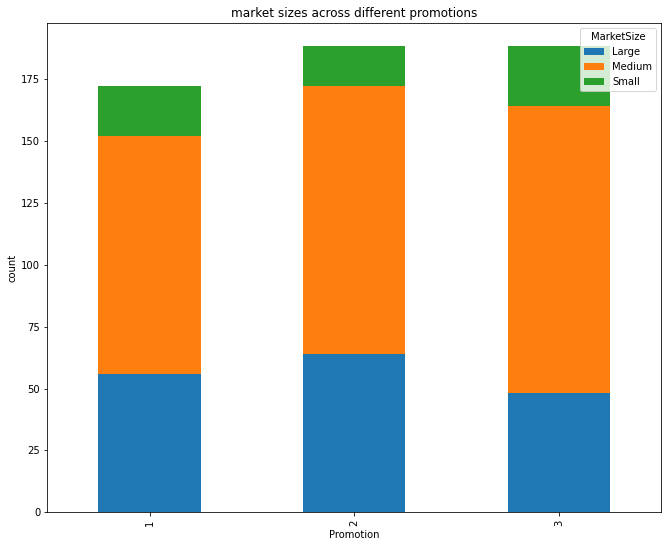

In [8]:
# Market Size Across Different Promotions 
ax = (
    df.groupby(["Promotion", "MarketSize"])
    .count()["MarketID"]
    .unstack("MarketSize")
    .plot(kind="bar", figsize=(11, 9), stacked=True)
)
ax.set_ylabel("count")
ax.set_title("market sizes across different promotions")

In [7]:
df.groupby(["MarketSize", "week"]).agg({"SalesInThousands": ["count", "mean", "sum"]})

SalesInThousands                    
                           count       mean      sum
MarketSize week                                     
Large      1                  42  70.793333  2973.32
           2                  42  68.656667  2883.58
           3                  42  70.647381  2967.19
           4                  42  70.369524  2955.52
Medium     1                  80  44.403875  3552.31
           2                  80  44.378125  3550.25
           3                  80  44.107500  3528.60
           4                  80  43.051875  3444.15
Small      1                  15  56.245333   843.68
           2                  15  58.675333   880.13
           3                  15  55.348667   830.23
           4                  15  59.368000   890.52

## Conducting the Test

Null Hypothesis : There is no statistically significant difference between the two types of promotions.

Alternative Hypothesis : There is a statistically significant difference between the two promotions

In [5]:
## Comparing Promotion 1 and 2

promotion_1 = df[df["Promotion"] == 1]
promotion_2 = df[df["Promotion"] == 2]

p1_vs_p2 = ttest_ind(promotion_1["SalesInThousands"], promotion_2["SalesInThousands"])

print(p1_vs_p2)

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)


#### We got the t-value of 6.453 and p-value of 3.550e-10 (which is an extremely small number). 

#### This suggests that there is strong evidence against the null hypothesis, meaning promotion 1 outperforms promotion 2  

In [10]:
## Comparing Promotion 2 and 3

promotion_1 = df[df["Promotion"] == 2]
promotion_3 = df[df["Promotion"] == 3]

p2_vs_p3 = ttest_ind(promotion_2["SalesInThousands"], promotion_3["SalesInThousands"])

print(p2_vs_p3)

Ttest_indResult(statistic=-4.88139271089348, pvalue=1.562894303627738e-06)


#### We got the t-value of -4.88 and p-value of 1.5628-06 (which is an extremely small number) 

#### that suggest that there is strong evidence against the null hypothesis, meaning promotion 2 outperforms promotion 3

In [6]:
## Comparing Promotion 1 and 3

promotion_1 = df[df["Promotion"] == 1]
promotion_3 = df[df["Promotion"] == 3]

p1_vs_p3 = ttest_ind(promotion_1["SalesInThousands"], promotion_3["SalesInThousands"])

print(p1_vs_p3)

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313273)


#### Here we have the t-value of 1.5560 and the p-value of 0.1205 (which is much higher than 0.05). 

#### This result suggests that there is no statistically significant difference between promotion groups 1 and 3 even though the average sales from promotion group 1 (58.1) is higher than in group 3 (55.36).


## Summary 

#### In this analysis I found that the company should use eithier promotion strategies 1 or 2 to maximize their sales.